In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

In [0]:
FILENAME = "bike_prediction_customer_data_processed.csv"

df = pd.read_csv(FILENAME)
df.head()

,ID,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,1,53,1,3,2,4,3,0
1,2,27,0,4,1,1,1,1
2,3,39,0,2,2,4,4,0
3,4,20,0,2,3,1,4,0
4,5,29,1,1,2,4,3,1


In [0]:
df.rename(columns = {"ID":"id","Age": "age", "Gender":"sex","Occupation":"occupation", "Phone Type": "phone", "Current Bike":"bike", "Relationship":'relationship',"Response":"buy"}, inplace=True)
df.head()

,id,age,sex,occupation,phone,bike,relationship,buy
0,1,53,1,3,2,4,3,0
1,2,27,0,4,1,1,1,1
2,3,39,0,2,2,4,4,0
3,4,20,0,2,3,1,4,0
4,5,29,1,1,2,4,3,1


In [0]:
df.describe()

,id,age,sex,occupation,phone,bike,relationship,buy
count,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000
mean,759.500000,32.731225,0.462451,2.110013,2.324769,3.022398,2.342556,0.574440
std,438.353168,13.258555,0.498752,1.179541,0.819541,1.303926,1.133150,0.494591
min,1.000000,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,380.250000,22.000000,0.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,759.500000,28.000000,0.000000,2.000000,3.000000,3.000000,2.000000,1.000000
75%,1138.750000,44.000000,1.000000,3.000000,3.000000,4.000000,3.000000,1.000000
max,1518.000000,60.000000,1.000000,4.000000,3.000000,5.000000,4.000000,1.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Data columns (total 8 columns):
id              1518 non-null int64
age             1518 non-null int64
sex             1518 non-null int64
occupation      1518 non-null int64
phone           1518 non-null int64
bike            1518 non-null int64
relationship    1518 non-null int64
buy             1518 non-null int64
dtypes: int64(8)
memory usage: 95.0 KB


In [0]:
df_onehot = pd.get_dummies(data=df, columns=['phone','sex','occupation','bike','relationship'])
df_onehot.head()

,id,age,buy,phone_1,phone_2,phone_3,sex_0,sex_1,occupation_1,occupation_2,...,occupation_4,bike_1,bike_2,bike_3,bike_4,bike_5,relationship_1,relationship_2,relationship_3,relationship_4
0,1,53,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,2,27,1,1,0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,0,0
2,3,39,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,4,20,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,5,29,1,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0


        Student	1		Low End	1		No Bike	1		    Single	1		    Male	1
    Unemployed	2		Average	2		Below 125	2		Committed	2		Female	0
Professional	3		High End 3		125 to 180	3		Complicated	3			
Self Employed	4					    180 to 220	4		Married	4			
						                220 and Above	5						
![image.png](attachment:image.png)

We have data regarding the demographics of purchasers of bikes. The data we have is:
•	Age: 18-60, with an average of 32… There is a large proportion of population in the lower age brackets
•	Gender: 816 female, 702 male
•	Occupation: Students, Professional, Self-employed, and unemployed. There is a large proportion of students
•	Bike currently owned: a range from no-bike to a large bike
•	Phone-type: low-end, average-phone, high-end-phone
•	Relationship: married, single, committed, complicated


Categorical data is one-hot encoded so that it can be compared

In [0]:
df_onehot.rename(columns = {"sex_0":"female","sex_1": "male", "occupation_1":"student","occupation_2":"unemployed", "occupation_3": "professional", "occupation_4":"self_employed", "relationship_1":'single',"relationship_2":"committed","relationship_3":"complicated","relationship_4":"married","phone_1":"low-end-phone", "phone_2":"average-phone","phone_3":"high-end-phone", "bike_1":"no_bike","bike_2":"bike-below125","bike_3":"bike-125-180", "bike_4":"bike-10-220","bike_5":"bike220plus"}, inplace=True)
df_onehot.head()


,id,age,buy,low-end-phone,average-phone,high-end-phone,female,male,student,unemployed,...,self_employed,no_bike,bike-below125,bike-125-180,bike-10-220,bike220plus,single,committed,complicated,married
0,1,53,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,2,27,1,1,0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,0,0
2,3,39,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,4,20,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,5,29,1,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0


In [0]:

corr_matrix = df_onehot.corr()
corr_matrix["buy"].sort_values(ascending=False)

buy               1.000000
student           0.572735
id                0.515978
high-end-phone    0.409199
bike-10-220       0.222585
single            0.118333
male              0.063448
bike-125-180      0.008730
complicated      -0.014053
committed        -0.016584
bike220plus      -0.035459
female           -0.063448
bike-below125    -0.091450
married          -0.104726
no_bike          -0.146020
self_employed    -0.223786
average-phone    -0.235893
low-end-phone    -0.251791
professional     -0.257266
unemployed       -0.257730
age              -0.552044
Name: buy, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AB8C550>,
      dtype=object)

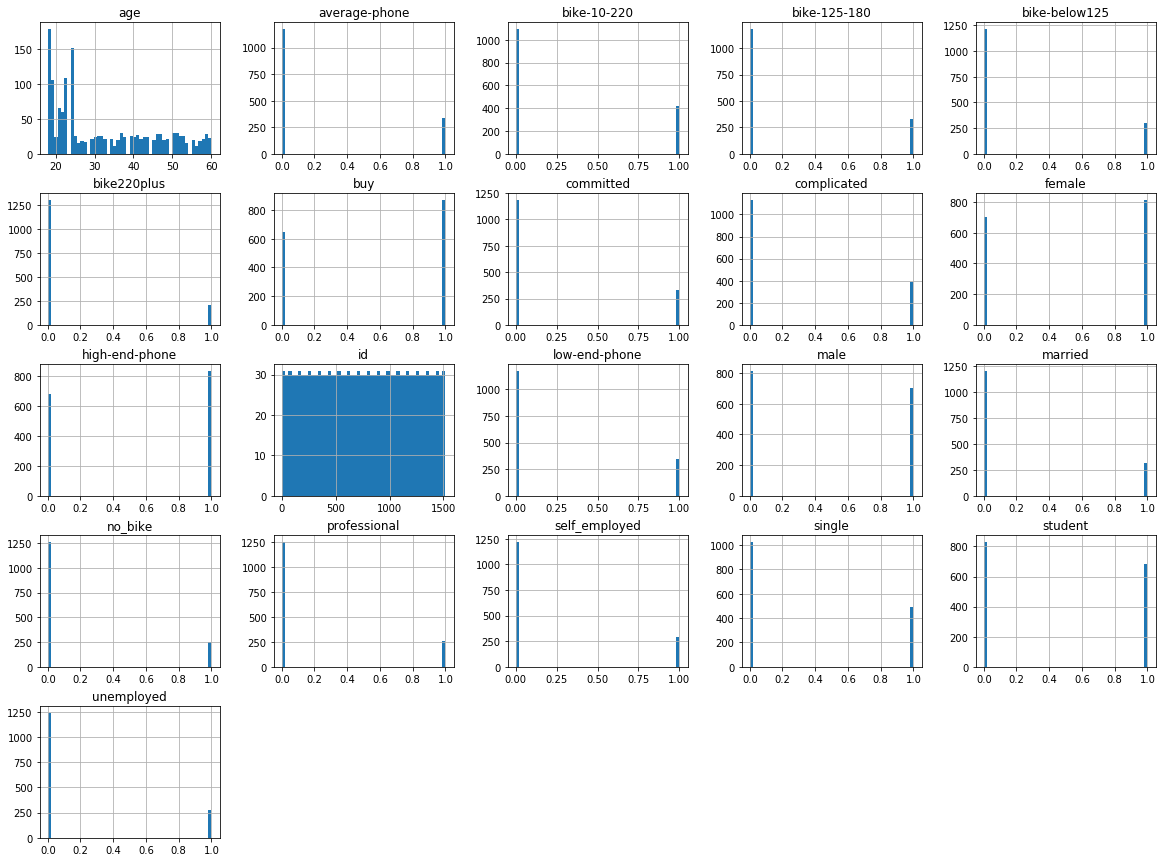

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
df_onehot.hist(bins=50, figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B07D278>,
      dtype=object)

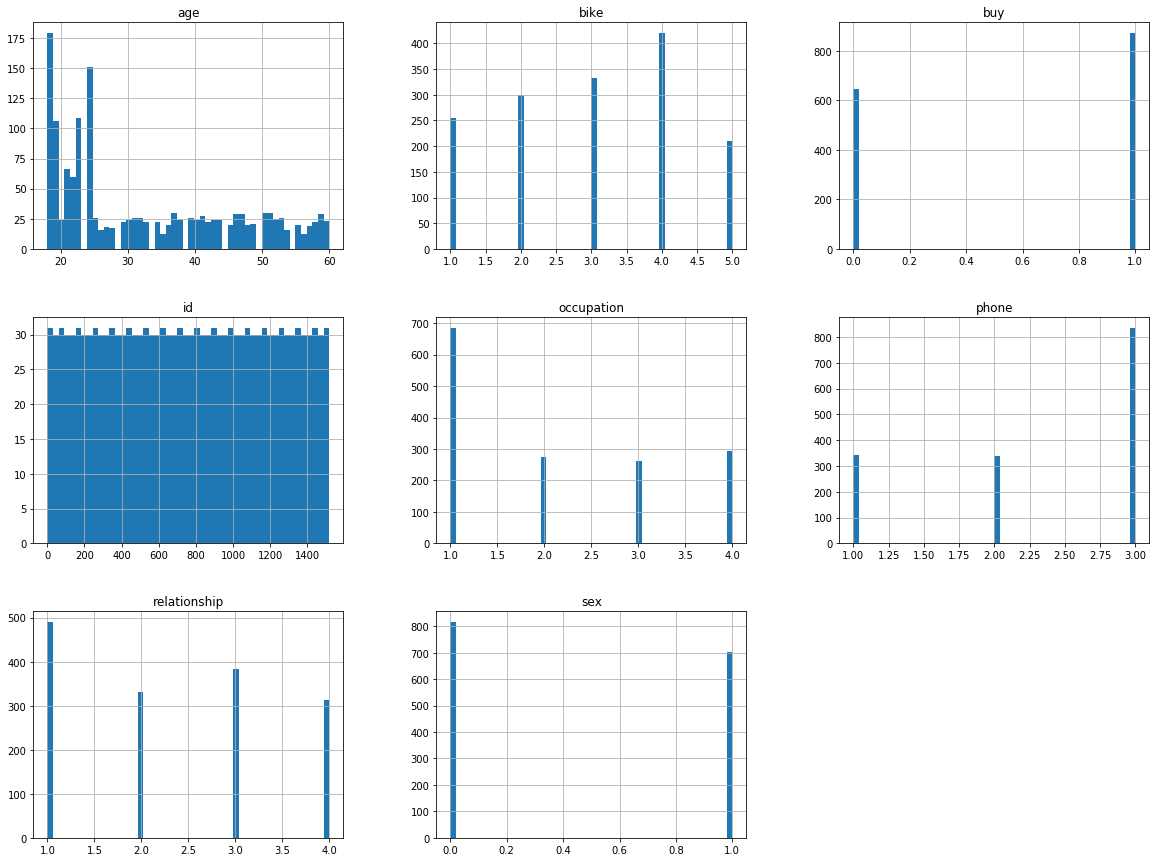

In [0]:
df.hist(bins=50, figsize=(20,15))

In [0]:
df_onehot.columns.values

array(['id', 'age', 'buy', 'low-end-phone', 'average-phone',
       'high-end-phone', 'female', 'male', 'student', 'unemployed',
       'professional', 'self_employed', 'no_bike', 'bike-below125',
       'bike-125-180', 'bike-10-220', 'bike220plus', 'single',
       'committed', 'complicated', 'married'], dtype=object)

In [0]:
sum_column = df_onehot.sum(axis=0)
sum_column


id                1152921
age                 49686
buy                   872
low-end-phone         343
average-phone         339
high-end-phone        836
female                816
male                  702
student               686
unemployed            274
professional          263
self_employed         295
no_bike               254
bike-below125         300
bike-125-180          333
bike-10-220           420
bike220plus           211
single                490
committed             331
complicated           384
married               313
dtype: int64

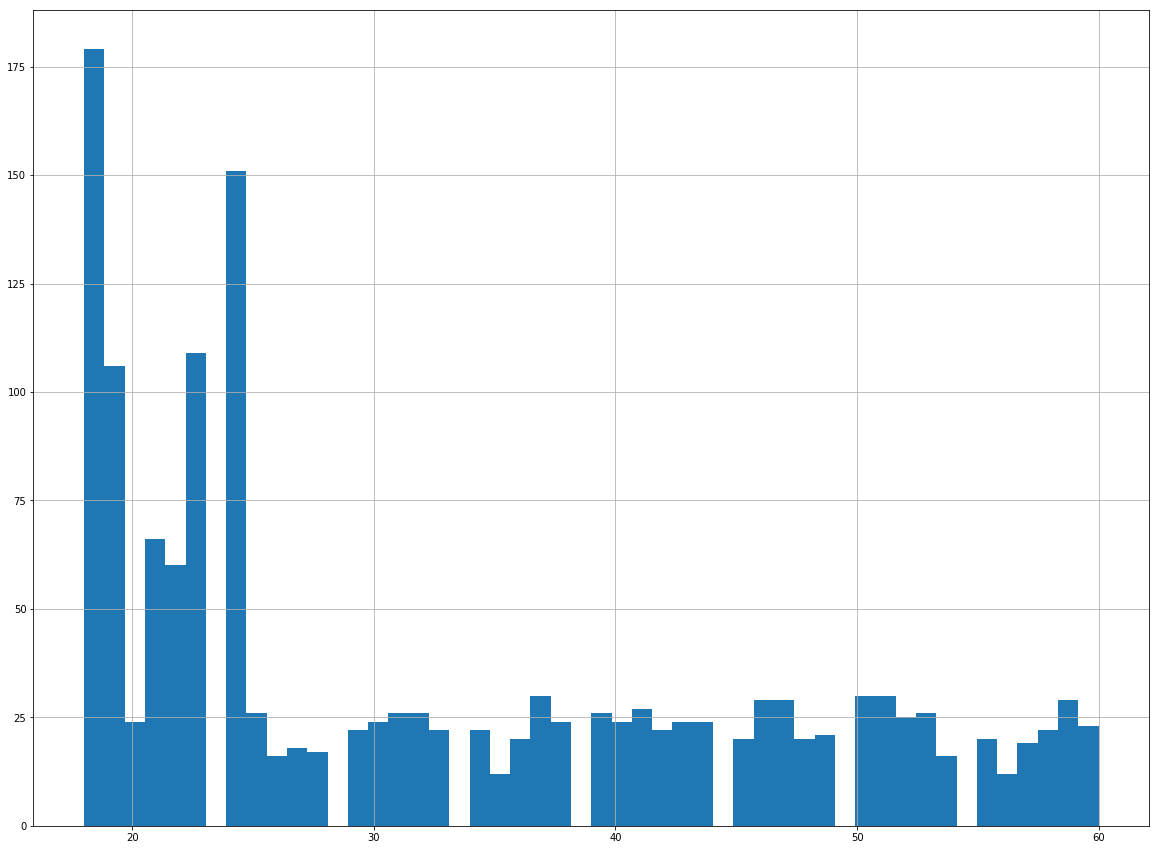

In [0]:
age = df['age']

age.hist(bins=50, figsize=(20,15))


In [0]:
age

0       53
1       27
2       39
3       20
4       29
5       54
6       47
7       44
8       38
9       24
10      38
11      23
12      45
13      34
14      46
15      44
16      54
17      51
18      25
19      47
20      50
21      19
22      47
23      23
24      42
25      54
26      31
27      24
28      21
29      31
        ..
1488    18
1489    24
1490    23
1491    18
1492    24
1493    19
1494    24
1495    18
1496    23
1497    18
1498    22
1499    21
1500    19
1501    18
1502    24
1503    23
1504    18
1505    24
1506    19
1507    24
1508    18
1509    23
1510    18
1511    22
1512    21
1513    19
1514    18
1515    24
1516    23
1517    18
Name: age, Length: 1518, dtype: int64

In [0]:
age_sum_row = age.value_counts().sort_values()

age_sum_row

35     12
56     12
26     16
54     16
28     17
27     18
57     19
45     20
36     20
48     20
55     20
49     21
42     22
33     22
34     22
58     22
29     22
60     23
44     24
40     24
30     24
20     24
43     24
38     24
52     25
53     26
39     26
32     26
31     26
25     26
41     27
47     29
59     29
46     29
37     30
50     30
51     30
22     60
21     66
19    106
23    109
24    151
18    179
Name: age, dtype: int64

SCALAR

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])



In [0]:
y = df_onehot['buy']
X = df_onehot[['age', 'low-end-phone', 'average-phone',
       'high-end-phone', 'female', 'male', 'student', 'unemployed',
       'professional', 'self_employed', 'no_bike', 'bike-below125',
       'bike-125-180', 'bike-10-220', 'bike220plus', 'single',
       'committed', 'complicated', 'married']]


SPLIT TRAINING TEST SET

In [0]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [0]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
lin_reg.score(X_test,y_test)

0.41856808516830446

In [0]:
y_pred=lin_reg.predict(X_test)

accuracy_score(y_test, y_pred.round(), normalize=False)



232

In [0]:
lin_reg.coef_

array([-0.01086819, -0.04553981, -0.019627  ,  0.06516681, -0.05364855,
        0.05364855,  0.25593639, -0.09545834, -0.10398418, -0.05649388,
       -0.03683513, -0.04700745,  0.01405177,  0.0348763 ,  0.03491452,
        0.02371326,  0.00566193,  0.00287133, -0.03224651])

In [0]:
lin_reg.intercept_

0.8535842612144819

In [0]:
#naive bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
accuracy_score(y_test,y_pred)



0.7664473684210527

In [0]:
#standard vanilla forest

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train,y_train)

pred_y_0 = tree_clf.predict(X_train)

print (accuracy_score(pred_y_0,y_train))

0.7767710049423394


In [0]:
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the standardized test dataset with PCA
76.97%



In [0]:
RANDOM_STATE = 42
FIG_SIZE = (10, 7)

# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))




Prediction accuracy for the normal test dataset with PCA
76.97%


Prediction accuracy for the standardized test dataset with PCA
76.97%



0.7767710049423394


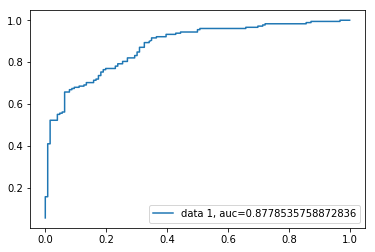

In [0]:
#support vector machine
from sklearn.svm import SVC
# Train model
clf_3 = SVC(kernel='linear', 
            class_weight='balanced', # penalize
            probability=True)
 
clf_3.fit(X_train, y_train)
 
# Predict on training set
pred_y_3 = clf_3.predict(X_train)
 
 
# How's our accuracy?
print( accuracy_score(y_train, pred_y_3) )

 
y_pred_proba3 = clf_3.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba3)
auc = metrics.roc_auc_score(y_test, y_pred_proba3)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

LOGISTIC REGRESSION

In [0]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
y_pred=logreg.predict(X_test)

In [0]:
cnf_matrix=metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 99,  27],
       [ 44, 134]], dtype=int64)

Text(0.5,257.44,'Predicted label')

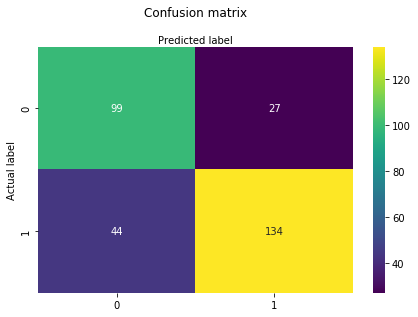

In [0]:
class_names=[1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7664473684210527
Precision: 0.8322981366459627
Recall: 0.7528089887640449


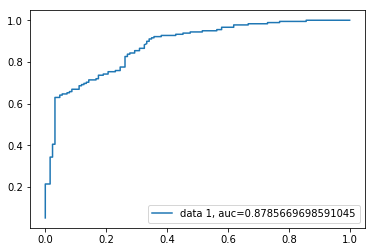

In [0]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logreg.coef_))], axis = 1)
coefficients

,0,0
0,age,-0.063320
1,low-end-phone,-0.004779
2,average-phone,0.120544
3,high-end-phone,0.696648
4,female,0.030870
5,male,0.781542
6,student,1.572036
7,unemployed,-0.299293
8,professional,-0.359914
9,self_employed,-0.100416


In [0]:

data = [[32,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1]]
demographic = pd.DataFrame(data, columns = ['age','low-end-phone', 'average-phone',
       'high-end-phone', 'female', 'male', 'student', 'unemployed',
       'professional', 'self_employed', 'no_bike', 'bike-below125',
       'bike-125-180', 'bike-10-220', 'bike220plus', 'single',
       'committed', 'complicated', 'married'])
demographic


,age,low-end-phone,average-phone,high-end-phone,female,male,student,unemployed,professional,self_employed,no_bike,bike-below125,bike-125-180,bike-10-220,bike220plus,single,committed,complicated,married
0,32,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1


In [0]:
predictions = logreg.predict_proba(demographic)
predictions

array([[0.71512909, 0.28487091]])

In [0]:
y_pred=gnb.predict(demographic)
y_pred

array([0], dtype=int64)

Try without one-hot encoding

In [0]:
df.columns.values

array(['id', 'age', 'sex', 'occupation', 'phone', 'bike', 'relationship',
       'buy'], dtype=object)

In [0]:
X1 = df[['age', 'sex', 'occupation', 'phone', 'bike', 'relationship']]
y1 = df['buy']

In [0]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.20,random_state=0)

In [0]:
logreg1 = LogisticRegression()
logreg1.fit(X1_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
y1_pred=logreg1.predict(X1_test)

In [0]:
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("Precision:",metrics.precision_score(y1_test, y1_pred))
print("Recall:",metrics.recall_score(y1_test, y1_pred))

Accuracy: 0.7796052631578947
Precision: 0.8245614035087719
Recall: 0.7921348314606742


In [0]:
coefficients1 = pd.concat([pd.DataFrame(X1.columns),pd.DataFrame(np.transpose(logreg1.coef_))], axis = 1)
coefficients1

,0,0
0,age,-0.073303
1,sex,0.706931
2,occupation,-0.505161
3,phone,0.558068
4,bike,0.181947
5,relationship,-0.119069


In conclusion, these are the coefficients. I find that the results didn't really require one hot encoding because the features of the data-set lend themselves to Linear analysis.